# Projeto Sprint 13

### Passo 1. Baixar os dados

In [1]:
#importando bibliotecas necessárias
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#importando os dados e verificando informações
gym = pd.read_csv('/datasets/gym_churn_us.csv')
print(gym.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

#### Comentário da aluna: 
Me parece que os tipos de dados estão todos corretos, sendo quase todos eles númericos, com execessão dos valores binários de 'gender', 'phone'... Também me parece não haver dados ausentes, mas vamos verificar.

In [3]:
#Verificando valores ausentes
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [4]:
#Verificando valores duplicados
gym.duplicated().sum()

0

#### Comentário da aluna:
Não há valores ausentes e nem duplicado, ufa!

### Passo 2. Realize análise exploratória dos dados (AED)

In [5]:
#Olhe para o conjunto de dados...
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Comentário da aluna: 
Não percebi nenhuma característica ausente, mas podemos ver que não é o melhor método para avaliar valores binários como gender. A média da idade dos cleintes é cerca de 29 anos e em torno de 26% dos clientes cancelaram sua assinatura no mês atual.

In [6]:
#Fazendo uma análise melhor dos dados binários
print("Distribuição das variáveis categóricas:")
print("\nGênero:")
print(gym['gender'].value_counts())
print("\nParceiro:")
print(gym['Partner'].value_counts())
print("\nPerto da localização:")
print(gym['Near_Location'].value_counts())
print("\nPromoção de amigos:")
print(gym['Promo_friends'].value_counts())

Distribuição das variáveis categóricas:

Gênero:
1    2041
0    1959
Name: gender, dtype: int64

Parceiro:
0    2053
1    1947
Name: Partner, dtype: int64

Perto da localização:
1    3381
0     619
Name: Near_Location, dtype: int64

Promoção de amigos:
0    2766
1    1234
Name: Promo_friends, dtype: int64


#### Comentário da aluna:
Não temos informações suficientes para dizer se o gênero 1 é feminino ou masculino, mas sabemos que há mais dele entre os dois. A mesma coisa acontece com o parceiro, o 0 é a maior variavél. 

In [7]:
#Observe a média dos valores médios das características em dois grupos...
gym.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Comentário da aluna:
Não temos os dados que informam se 0 é ou não os clientes que ficaram, mas pelas variáveis podemos supor que sim, já que a média de contrato é maior que a do grupo 1, eles também tem uma média maior de sessões em grupo. Além disso, o grupo 0 teve um maior gasto em outros serviços da academia e um 'tempo de vida' muito maior que o grupo 1. 

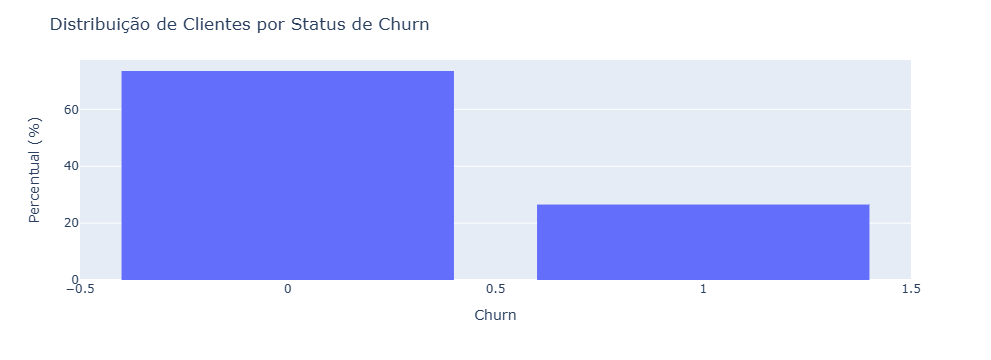

In [21]:
#Faça histogramas de barra e distribuições...
#Histograma grupo 0 - ficaram
fig = px.histogram(gym, x='Churn',histnorm='percent')
fig.update_layout(bargap=0.2, title="Distribuição de Clientes por Status de Churn", yaxis_title="Percentual (%)")
fig.show()

#### Comentário da aluna:
Pelo gráfico é possível ver que a maior parte dos alunos continuaram na academia, mas houve uma grande parcela que a deicou, cerca de 23,5%.

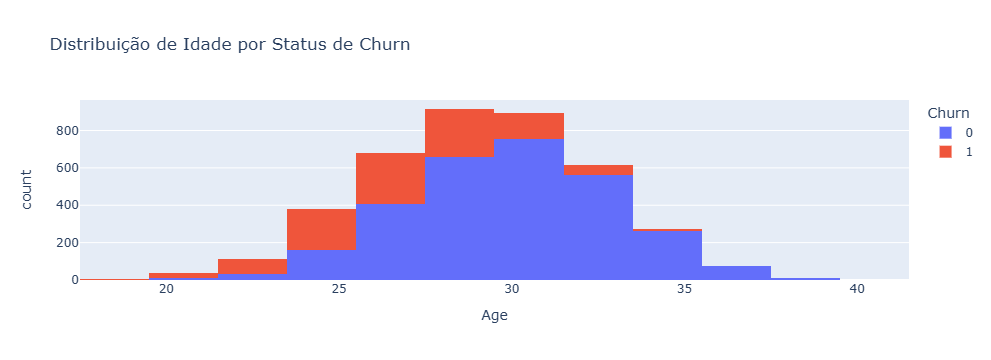

In [22]:
#Histograma por idade
fig = px.histogram(gym, x="Age", color="Churn", nbins=20, title="Distribuição de Idade por Status de Churn")
fig.show()

#### Comentário da aluna: 
Através do histograma vemos que a média de idade em que as pessoas mais desistem da academia é 24 até 30, depois dos 30 a tendência é não sair da academia. 

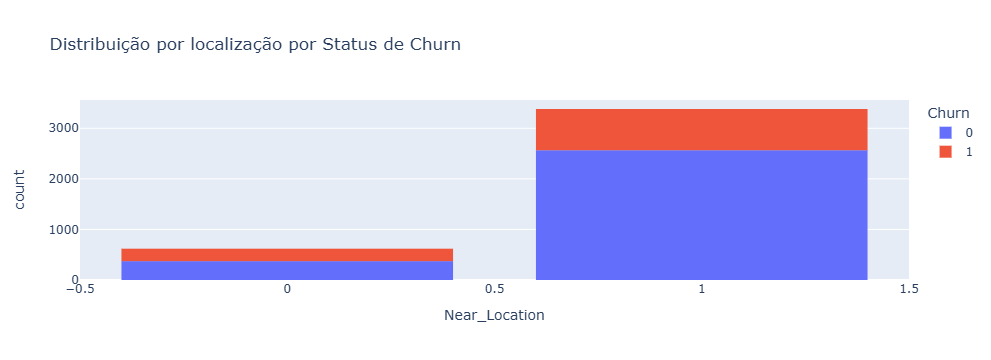

In [23]:
#Histograma por localização
fig = px.histogram(gym, x="Near_Location", color="Churn", title="Distribuição por localização por Status de Churn")
fig.update_layout(bargap=0.2)
fig.show()

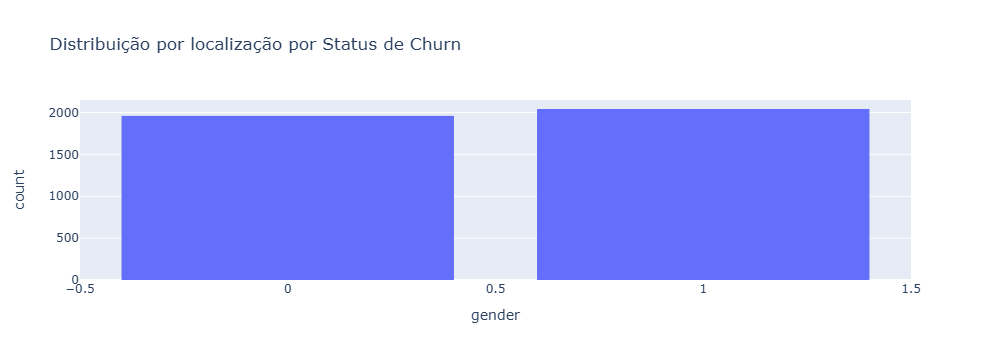

In [56]:
#Histograma por gênero
fig = px.histogram(gym, x="gender", title="Distribuição por localização por Status de Churn")
fig.update_layout(bargap=0.2)
fig.show()

#### Comentário da aluna:
É possível perceber que a maioria dos clientes moram na localização 1, provavelmente mais perto da academia, o que explica o porque da diferença de clientes da zona 1 e 0. A zona 0 deve ser mais afastada, por isso a quantidade de pessoas que ficam e as que vão embora são muito parecidas. 

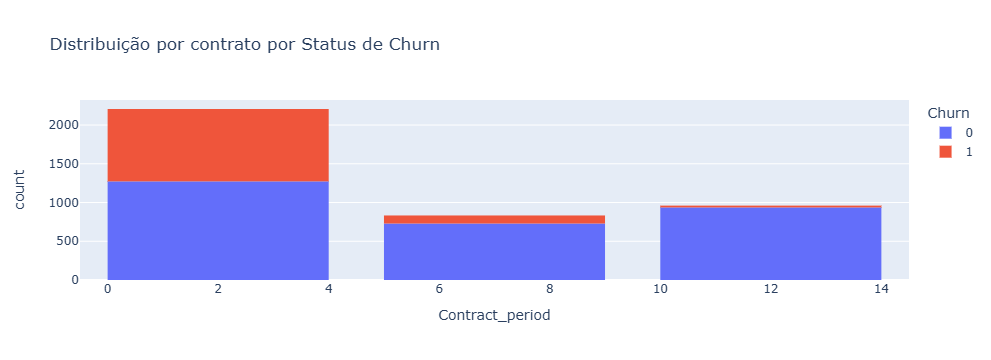

In [24]:
#Histograma por contrato
fig = px.histogram(gym, x="Contract_period", color="Churn", title="Distribuição por contrato por Status de Churn")
fig.update_layout(bargap=0.2)
fig.show()

#### Comentário da aluna: 
Podemos ver que o tempo ajuda na consistência! Quanto menos tempo de contrato, maior a chance de desistências, e quando maior o tempo, menor chance.

<AxesSubplot:title={'center':'Matriz de correlação'}>

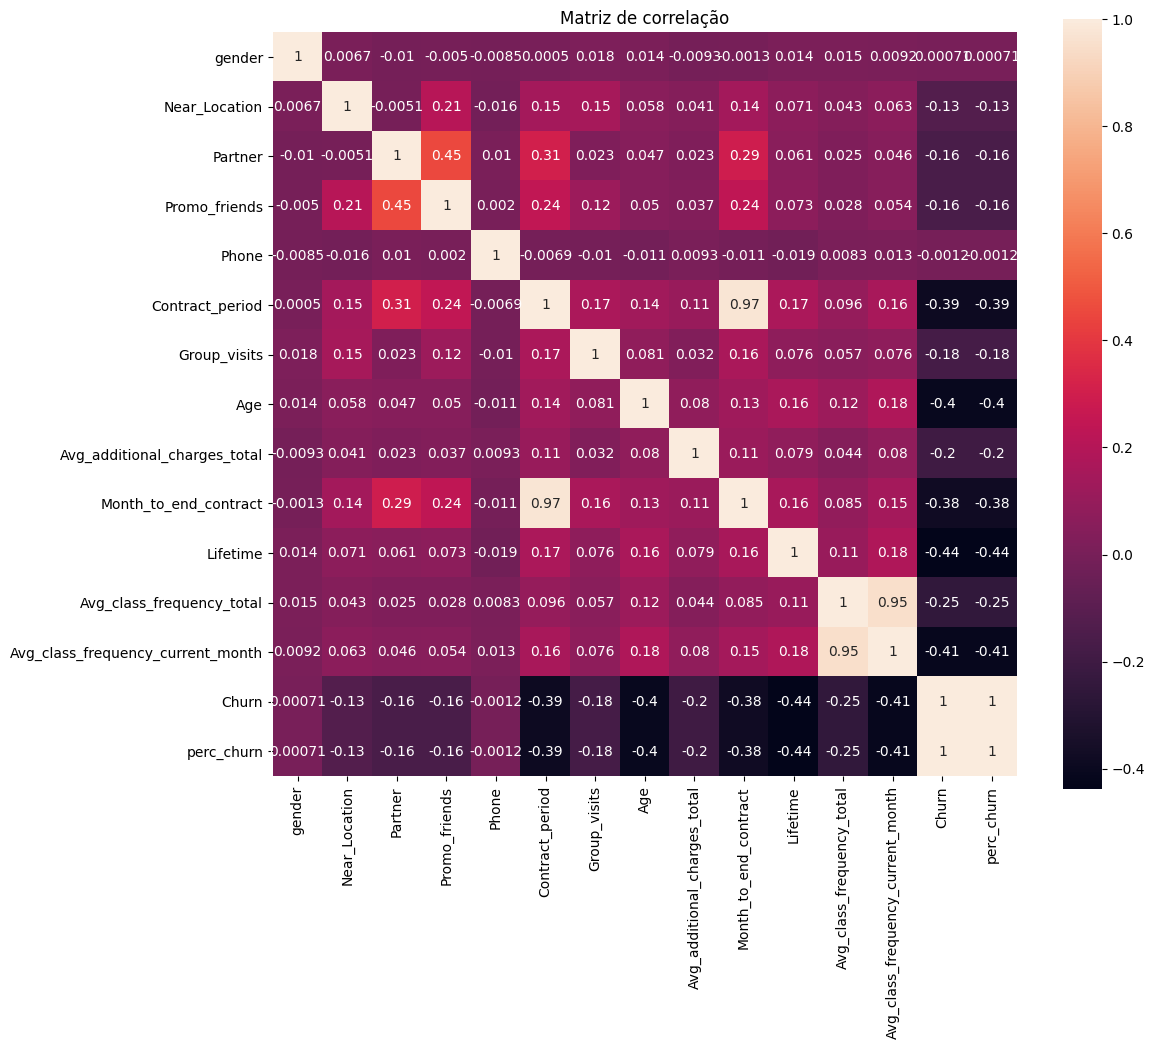

In [25]:
#Construa a matriz de correlação e a exiba.
cm = gym.corr()

#Criando mapa de calor para visualização
plt.figure(figsize=(12, 10))
plt.title('Matriz de correlação')
sns.heatmap(cm, annot=True, square=True)

### Passo 3. Construa um modelo para predizer a rotatividade de clientes

In [13]:
#variável objetivo(y): é a saída de usuários do próximo mês.

In [26]:
#dividindo as caracteristicas do objetivo 
X = gym.drop('Churn', axis=1)
y = gym['Churn']

In [27]:
#Dividindo os dados em conjuntos de treino e testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [28]:
#Padronizando os dados
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [29]:
#Definindo modelos
models = [LogisticRegression(random_state = 0),
         DecisionTreeClassifier(random_state = 0),
         RandomForestClassifier(random_state = 0)]

In [30]:
#Realizando função para treinar todos os modelos 
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    print ('Acurácia:{:.2f} Precisão:{:.2f} Sensibilidade {:.2f}'.format(accuracy_score(y_test,y_pred),
                                                                        precision_score(y_test,y_pred),
                                                                        recall_score(y_test,y_pred)))

In [31]:
#fazendo ciclo para cada métrica
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0)
Acurácia:1.00 Precisão:1.00 Sensibilidade 1.00
DecisionTreeClassifier(random_state=0)
Acurácia:1.00 Precisão:1.00 Sensibilidade 1.00
RandomForestClassifier(random_state=0)
Acurácia:1.00 Precisão:1.00 Sensibilidade 1.00


#### Comentário da aluna:
O melhor modelo foi o LogistcRegression, com uma melhor acurácia, precisão e principalmente sensibilidade.

In [32]:
#treinando o modelo final
final_model = LogisticRegression()
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)

### Passo 4. Crie agrupamentos de clientes

In [33]:
#Preparando os dados
#deletando a coluna 'churn' e deixando somente as caracteristicas
X_cluster = gym.drop('Churn', axis=1)
print("Shape dos dados para clustering:", X_cluster.shape)
print("\nColunas disponíveis:")
print(X_cluster.columns.tolist())

Shape dos dados para clustering: (4000, 14)

Colunas disponíveis:
['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'perc_churn']


In [34]:
#padronizando os dados
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)
print("Dados padronizados com shape:", X_cluster_scaled.shape)

Dados padronizados com shape: (4000, 14)


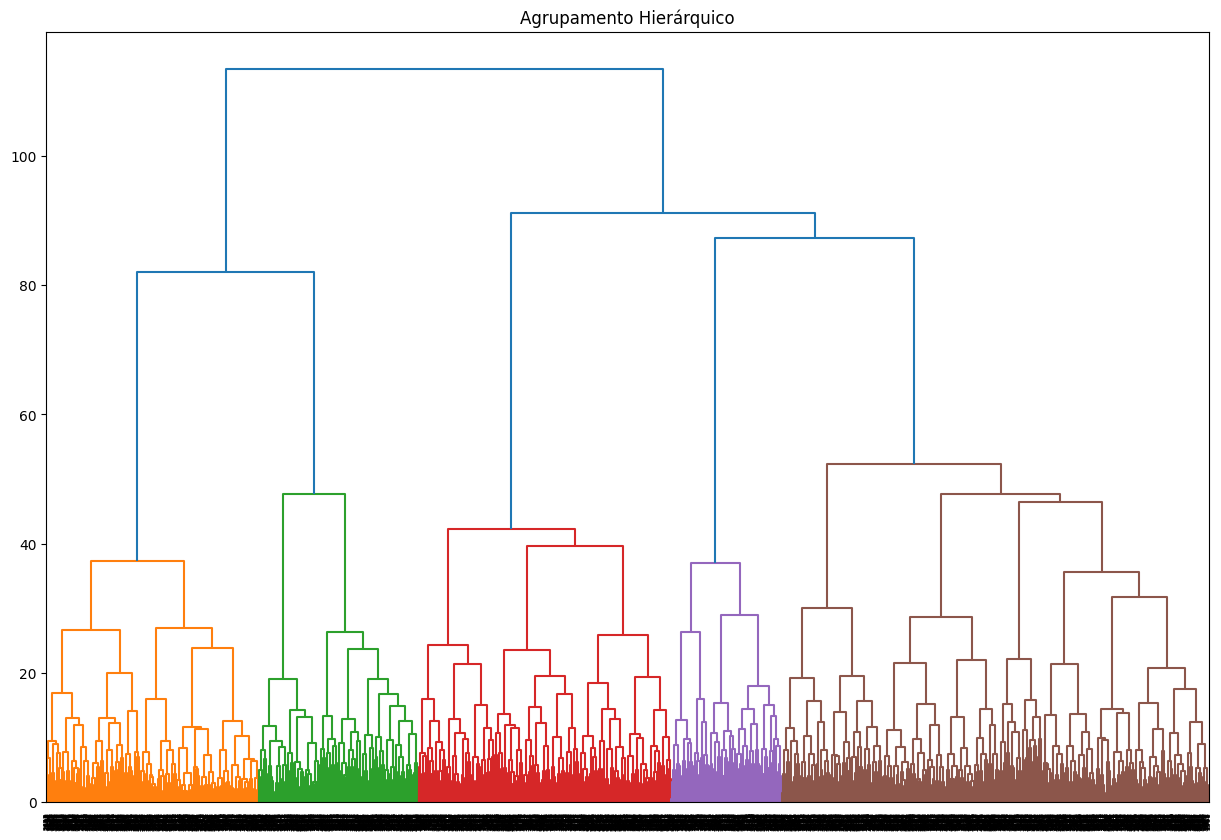

In [35]:
#construindo dendograma
linked = linkage(X_cluster_scaled, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupamento Hierárquico')
plt.show()

#### Comentário da aluna:
Acredito que podemos destacar 5 grupos.

In [36]:
#fazendo kmeans
km = KMeans(n_clusters=5)
labels = km.fit_predict(X_cluster_scaled)

In [37]:
# Adicionando os labels dos clusters ao dataset original
gym_clustered = gym.copy()
gym_clustered['Cluster'] = labels

In [50]:
# Verificando a distribuição dos clusters
print("Distribuição por porcentagem dos clusters:")
print(gym_clustered['Cluster'].value_counts(normalize=True).sort_index() * 100)

Distribuição por porcentagem dos clusters:
0    21.575
1    24.150
2     9.575
3    21.200
4    23.500
Name: Cluster, dtype: float64


#### Comentário da aluna: 
O maior grupo (1) teve 24,15% de pessoas enquanto o menos somente teve 9,5% de pessoas (2).

In [53]:
#valores médios das características para agrupamentos
gym_clustered.groupby(['Cluster']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,perc_churn
Cluster,,,,,,,,,,,,,,,
0,0.476246,0.826188,0.448436,0.253766,1.000000,2.651217,0.381228,30.012746,153.413381,2.468134,4.670915,1.181764,1.180831,0.001159,0.115875
1,0.503106,0.938923,0.768116,0.564182,1.000000,11.173913,0.557971,29.899586,161.514913,10.223602,4.704969,2.006679,2.001081,0.015528,1.552795
2,0.524804,0.866841,0.469974,0.308094,0.000000,4.806789,0.428198,29.331593,144.156967,4.493473,3.945170,1.855107,1.723740,0.263708,26.370757
3,0.549528,0.841981,0.373821,0.215802,0.998821,2.746462,0.442217,29.982311,160.307921,2.524764,4.591981,2.930992,2.937782,0.007075,0.707547
4,0.507447,0.760638,0.341489,0.179787,0.997872,1.567021,0.257447,26.908511,115.109065,1.513830,0.976596,1.448700,1.026250,0.997872,99.787234


#### Comentário da aluna: 


In [59]:
#Calcule a taxa de rotatividade para cada a
gym_clustered.groupby(['Cluster'])['Churn'].mean()

Cluster
0    0.001159
1    0.015528
2    0.263708
3    0.007075
4    0.997872
Name: Churn, dtype: float64

#### Comentário da aluna:
O grupo que tem uma maior taxa de rotatividade é o grupo 4 com cerca de 99,78% e o menor é o grupo 3 com cerca de 0,70%.

### Passo 5.Chegue a conclusões e faça recomendações básicas sobre trabalhar com clientes

#### Conclusões:
Através das métricas avaliadas podemos segmentar os grupos: 
- Grupo 0: formado por mais mulheres que homens, moram mais perto, não tem parceria, tem o telefone no cadastro,tem um contrato de menor tempo, frequenta menos aulas de grupo, uma idade média de 30 anos, tem uma boa média de gastos com serviços extras (153), está a um bom tempo na academia e tem uma taxa de rotatividade de 1,15%.
- Grupo 1: formado por mais homens que mulheres, mas ainda sim há uma grande quantidade de mulheres, sendo considerado um grupo misto, tem a moradia mais próxima da academia de todos os grupos, e é o grupo que mais tem companhia de parceria. Também é o grupo com mais indicações de amigos, têm o telefone no cadastrado, tem o maior tempo de contrato, é o grupo que mais faz sessões em grupo, uma idade média de 29-30 anos, são os que mais consomem serviços extras(161), estão na academia já faz uma boa média de tempo e tem uma taxa de rotatividade de 1,55%.
- Grupo 2: formado na sua maioria por homens, mas também há mulheres. Moram perto da academia, e menos da metade entrou com companhias parceiras e promoções de amigos. Não têm o telefone cadastrado, têm um contrato e idas nas sessoes de grupo na média na academia. Idade média de 29 anos, e tem um gasto extra médio também (144), sua taxa de rotatividade é de 26,3%, muito maior comparada aos grupos anteriores.
- Grupo 3: formado na maioria por homens que moram perto da academia e que a minoria entrou por companhias parceiras ou indicações de amigos. Têm o telefone cadastrado, um período curto de contrato, e uma média de sessões de grupos. Uma idade média de 29-30 anos, com um grande gasto em serviços extras (160) e com uma média de tempo na academia. Sua taxa de rotatividade é de 0,70%, a menor taxa dentre todos os grupos.
- Grupo 4: formado por mais homens, mas sendo considerado um grupo misto. É o grupo que mora mais longe da academia e os que menos entraram por parceiras e amigos. Têm o telefone cadastrado, é o grupo com menor tempo de contrato, sessões de grupos, idade, com uma média de 26 anos, serviços extras e tempo na academia. Sua taxa de rotatividade é de 99,78%, ou seja, altíssima. 

Com a segmentação dos grupos, fica mais claro onde investir e onde não investir. O grupo 4 pode ser considerado o pior grupo com base na taxa de rotatividade, já o grupo 3 o melhor.

Podemos explorar mais campanhas para moradores/trabalhadores próximos da academia direcionados para o público masculino com idade média de 29 a 35 anos e que procurem outros serviços extras que a academia oferece (nutrição, personal, café...)